# Import Required Libraries

In [1]:
# Basic packages
import os
import sys
from typing import List, Dict
import warnings
warnings.filterwarnings("ignore")

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# tensorflow packages
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import (Dense, 
                                     Input)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import (Adam,
                                     RMSprop)
from tensorflow.keras.losses import (MeanSquaredError, 
                                     MeanAbsoluteError)
from tensorflow.keras.metrics import R2Score

2.19.0


# Load Dataset 

#### 1. Dataset Information

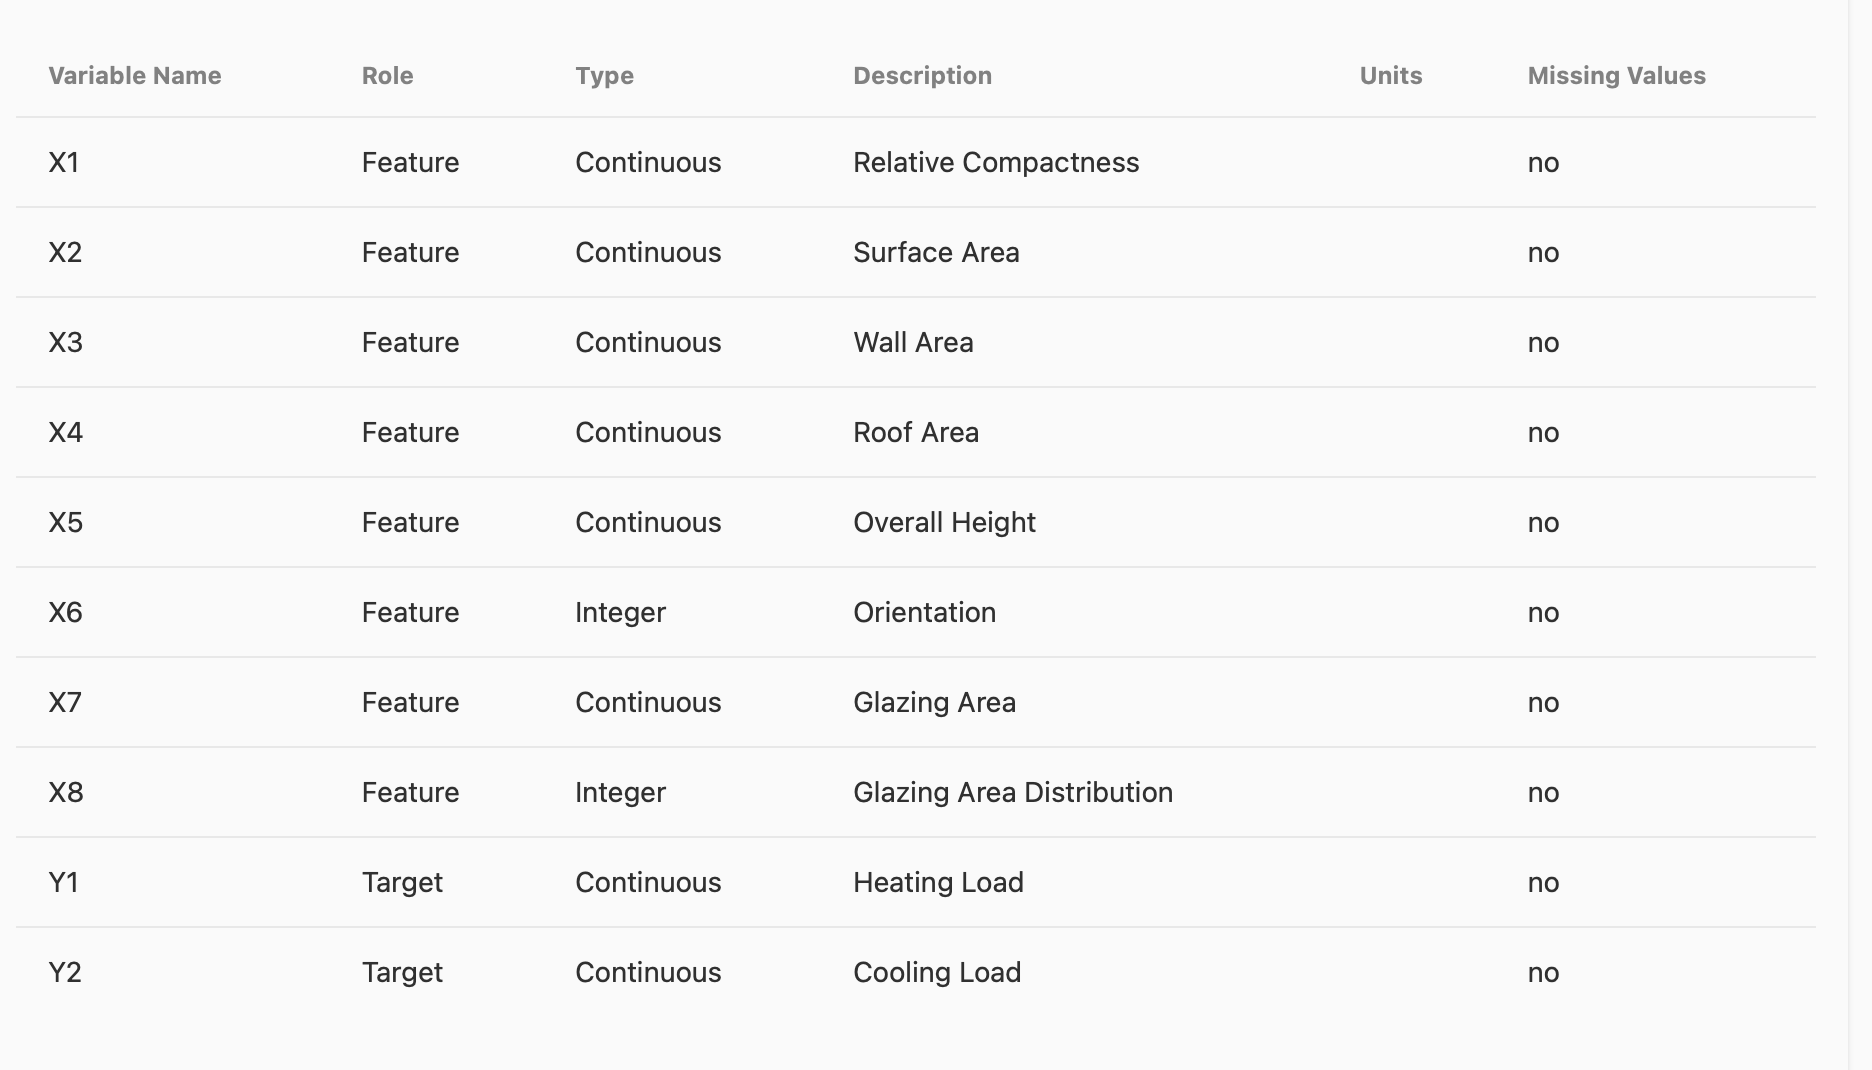


This is project is to assess the Heating load and Cooling load requirements of buildings. We have information about the building "Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", and "Glazing Area Distribution"

In [2]:
data = pd.read_csv("./data/ENB2012_data.csv")
print(f"====== Total No.of Records: {data.shape[0]} ====== ")
print(f"====== Total No.of Columns: {data.shape[1]} ====== ")
data.head()

====== Total No.of Records: 768 ====== 
====== Total No.of Columns: 10 ====== 


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Train_Test_Split

In [3]:
# 1. Split the dataset into train and validation
X, y = data.drop(["Y1","Y2"], axis = 1).to_numpy(), data[["Y1", "Y2"]].to_numpy()
X_train, X_val, y_train, y_val =  train_test_split(X, y, train_size= 0.70, random_state= 42)

print(f"Shape of the X_train:{X_train.shape}")
print(f"Shape of the X_val:{X_val.shape}")
print("*" * 200)

# Split y_train into y1_train and y2_train
y1_train, y2_train = y_train[:, 0], y_train[:, 1]
print(f"Shape of the y1_train:{y1_train.shape}")
print(f"Shape of the y2_train:{y2_train.shape}")
print("*" * 200)

# 2. Split the dataset into val and test
X_val, X_test, y_val, y_test =  train_test_split(X_val, y_val, train_size= 0.50, random_state= 42)

print(f"Shape of the X_val:{X_val.shape}")
print(f"Shape of the X_test:{X_test.shape}")
print("*" * 200)

# Split y_train into y1_val and y2_val
y1_val, y2_val = y_val[:, 0], y_val[:, 1]
print(f"Shape of the y1_val:{y1_val.shape}")
print(f"Shape of the y2_val:{y2_val.shape}")
print("*" * 200)

# Split y_train into y1_val and y2_val
y1_test, y2_test = y_test[:, 0], y_test[:, 1]
print(f"Shape of the y1_test:{y1_val.shape}")
print(f"Shape of the y2_test:{y2_val.shape}")

Shape of the X_train:(537, 8)
Shape of the X_val:(231, 8)
********************************************************************************************************************************************************************************************************
Shape of the y1_train:(537,)
Shape of the y2_train:(537,)
********************************************************************************************************************************************************************************************************
Shape of the X_val:(115, 8)
Shape of the X_test:(116, 8)
********************************************************************************************************************************************************************************************************
Shape of the y1_val:(115,)
Shape of the y2_val:(115,)
**************************************************************************************************************************************************************************

# Neural Network Architecture - Functional API

In [4]:
input_layer = Input(shape = (X_train.shape[1],  ))

# define the dense layers
first_dense = Dense(units = 128, activation= 'relu')(input_layer)
second_dense = Dense(units = 128, activation= 'relu')(first_dense)
second_1_dense = Dense(units = 128, activation= 'relu')(second_dense)
second_2_dense = Dense(units = 128, activation= 'relu')(second_1_dense)
second_3_dense = Dense(units = 128, activation= 'relu')(second_2_dense)

# Prediction of "Y1" first output
y1_output = Dense(units = 1, name = "y1_output")(second_3_dense)

# Prediction of "Y2" second output
third_dense = Dense(units = 128, activation= "relu")(second_3_dense)
fourth_dense = Dense(units = 128, activation= "relu")(third_dense)
y2_output = Dense(units = 1, name = "y2_output")(fourth_dense)

model = Model(inputs = input_layer, outputs = [y1_output, y2_output])
model.summary()

2025-06-15 21:44:42.119431: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-15 21:44:42.119455: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-06-15 21:44:42.119459: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1750041882.119469 6037896 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750041882.119483 6037896 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      1,152 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     16,512 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     16,512 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     16,512 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     16,512 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y1_output (Dense)   │ (None, 1)         │        129 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y2_output (Dense)   │ (None, 1)         │        129 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 100,482 (392.51 KB)

 Trainable params: 100,482 (392.51 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [5]:
model.compile(optimizer = Adam(), 
              loss = {'y1_output': MeanSquaredError(), 
                      'y2_output': MeanSquaredError()})

# Fit the Model

In [6]:
history = model.fit(X_train, [y1_train, y2_train], 
          epochs = 100, 
          verbose = 2,
          validation_data = (X_val, [y1_val, y2_val])
          )

Epoch 1/100


2025-06-15 21:44:42.656861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


17/17 - 2s - 100ms/step - loss: 19079.0918 - val_loss: 1715.0815 - val_y1_output_loss: 46.2700 - val_y2_output_loss: 1703.0251 - y1_output_loss: 822.2405 - y2_output_loss: 18016.1074
Epoch 2/100
17/17 - 0s - 18ms/step - loss: 1798.4281 - val_loss: 2106.6365 - val_y1_output_loss: 37.8075 - val_y2_output_loss: 2035.1011 - y1_output_loss: 94.2044 - y2_output_loss: 1699.5707
Epoch 3/100
17/17 - 0s - 16ms/step - loss: 813.4678 - val_loss: 1197.0431 - val_y1_output_loss: 84.0881 - val_y2_output_loss: 1091.2015 - y1_output_loss: 76.0348 - y2_output_loss: 729.4317
Epoch 4/100
17/17 - 0s - 18ms/step - loss: 534.0134 - val_loss: 405.6996 - val_y1_output_loss: 46.4299 - val_y2_output_loss: 350.5883 - y1_output_loss: 90.5362 - y2_output_loss: 440.9156
Epoch 5/100
17/17 - 0s - 16ms/step - loss: 252.9251 - val_loss: 200.3034 - val_y1_output_loss: 46.5228 - val_y2_output_loss: 149.5312 - y1_output_loss: 57.0562 - y2_output_loss: 194.6051
Epoch 6/100
17/17 - 0s - 16ms/step - loss: 169.3280 - val_loss:

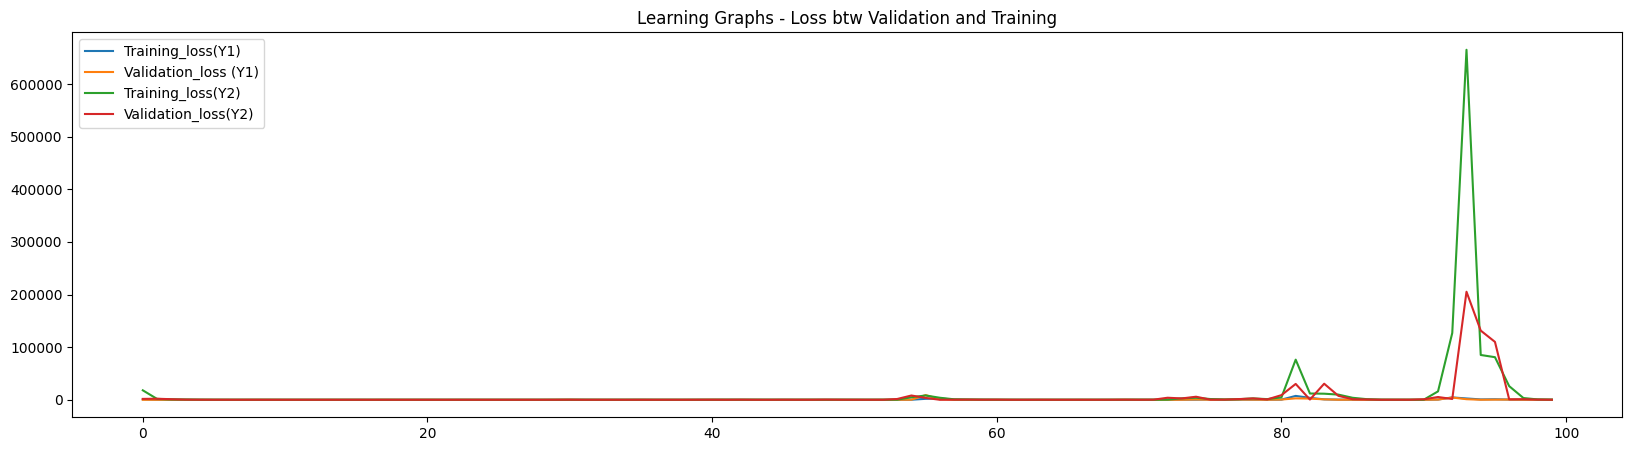

In [7]:
plt.figure(figsize= (20, 5))

plt.plot(history.history["y1_output_loss"], label = "Training_loss(Y1)")
plt.plot(history.history["val_y1_output_loss"], label = "Validation_loss (Y1)")

plt.plot(history.history["y2_output_loss"], label = "Training_loss(Y2)")
plt.plot(history.history["val_y2_output_loss"], label = "Validation_loss(Y2)")

plt.legend()
plt.title("Learning Graphs - Loss btw Validation and Training")
plt.show()


# Evaluate the Model

In [8]:
loss, mse_y1, mse_y2 = model.evaluate(X_test, [y1_test, y2_test], verbose = 0)
print(f"Test Loss: {loss}")
print(f"Test Mean Square Error (Y1): {mse_y1}")
print(f"Test Mean Square Error (Y2): {mse_y2}")

Test Loss: 141.4160614013672
Test Mean Square Error (Y1): 64.99615478515625
Test Mean Square Error (Y2): 78.00997924804688


# Val Prediction

In [17]:
y1_val_pred, y2_val_pred = model.predict(X_val)
print(f"Shape of y1_val_pred:{y1_val_pred.shape}")
print(f"Shape of y2_val_pred:{y2_val_pred.shape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Shape of y1_val_pred:(115, 1)
Shape of y2_val_pred:(115, 1)


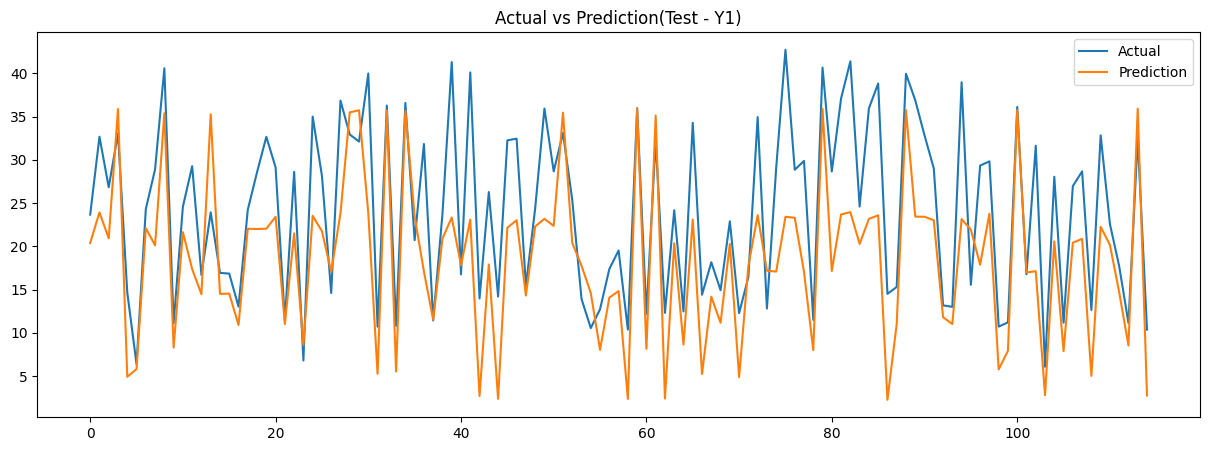

In [18]:
plt.figure(figsize = (15, 5))

plt.plot(y1_val, label = "Actual")
plt.plot(np.hstack(y1_val_pred), label = "Prediction")

plt.legend()
plt.title("Actual vs Prediction(Test - Y1)")
plt.show()

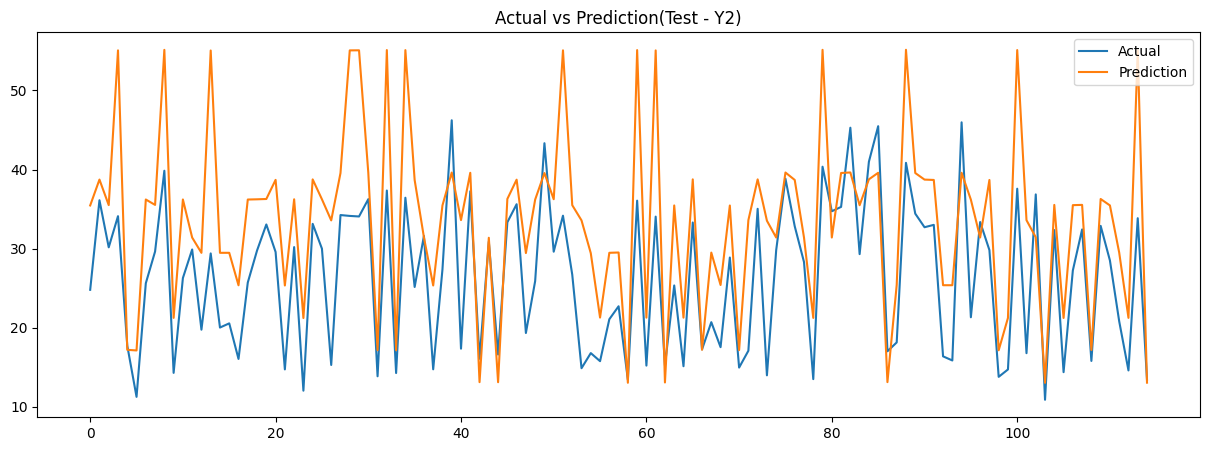

In [19]:
plt.figure(figsize = (15, 5))

plt.plot(y2_val, label = "Actual")
plt.plot(np.hstack(y2_val_pred), label = "Prediction")

plt.legend()
plt.title("Actual vs Prediction(Test - Y2)")
plt.show()

In [21]:
print("Fittness of Model (Y1): ",r2_score(y1_val, y1_val_pred))
print("Fittness of Model (Y2): ",r2_score(y2_val, y2_val_pred))

Fittness of Model (Y1):  0.37262987074422727
Fittness of Model (Y2):  -0.118105702750394


# Test Predictions

In [9]:
y1_test_pred, y2_test_pred = model.predict(X_test)
print(f"Shape of y1_test_pred:{y1_test_pred.shape}")
print(f"Shape of y2_test_pred:{y2_test_pred.shape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Shape of y1_test_pred:(116, 1)
Shape of y2_test_pred:(116, 1)


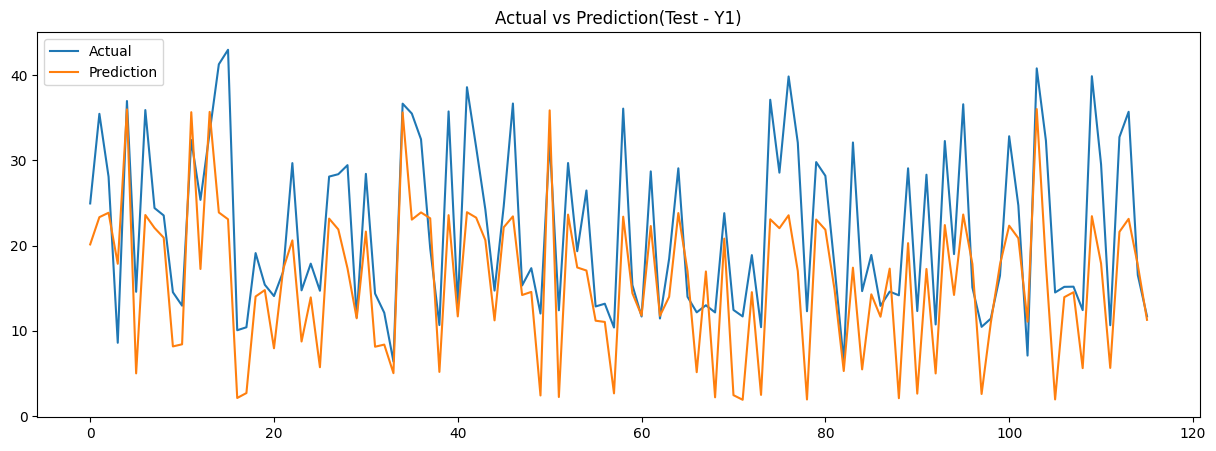

In [15]:
plt.figure(figsize = (15, 5))

plt.plot(y1_test, label = "Actual")
plt.plot(np.hstack(y1_test_pred), label = "Prediction")

plt.legend()
plt.title("Actual vs Prediction(Test - Y1)")
plt.show()

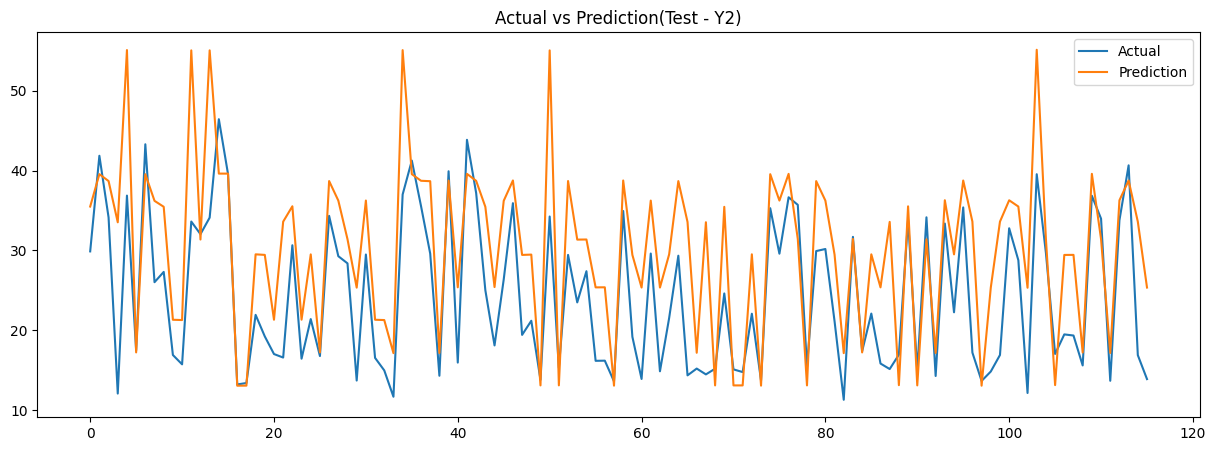

In [16]:
plt.figure(figsize = (15, 5))

plt.plot(y2_test, label = "Actual")
plt.plot(np.hstack(y2_test_pred), label = "Prediction")

plt.legend()
plt.title("Actual vs Prediction(Test - Y2)")
plt.show()

In [13]:
print("Fittness of Model (Y1): ",r2_score(y1_test, y1_test_pred))
print("Fittness of Model (Y2): ",r2_score(y2_test, y2_test_pred))

Fittness of Model (Y1):  0.3398551717753433
Fittness of Model (Y2):  0.13847507329024644


# Learnings:

- Using both "relu" and "tanh" back and forth can cause gradient issues. Example:
    - tanh squashes between [-1, 1]
    - relu zeroes out negatives

This back and forth flow may lead to vanishing gradient in deeper networks

